# Imports

In [2]:
from metrics import amape_score

import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
import importlib
import sin_model
importlib.reload(sin_model)
from sin_model import get_sb_model

# Synthetic Data Generation

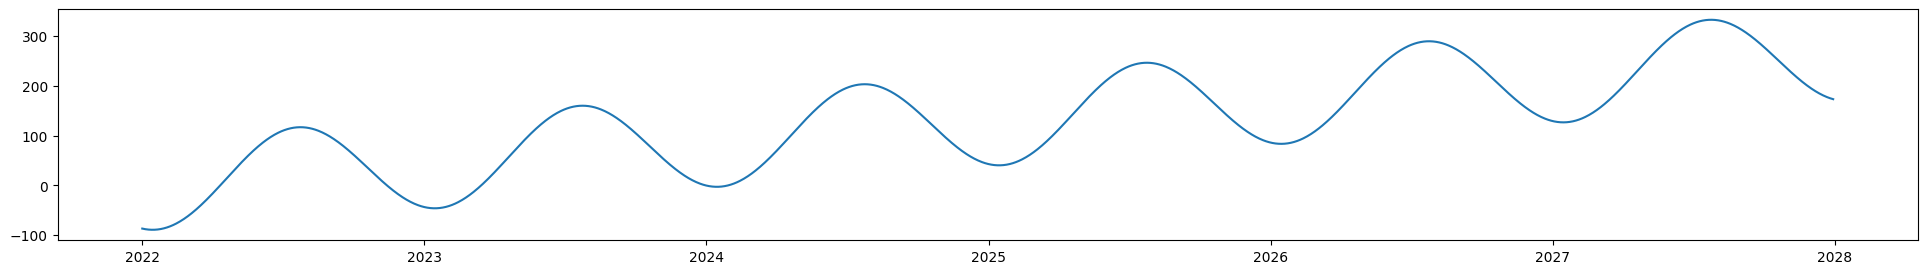

In [24]:
n_years = np.random.randint(1, 15)
frequency = 2 * np.pi / 365.25

beta = 1
elevation_power = 0
amplitude_change_power = 0
variation = True

amplitude = np.random.randint(-100, 100)
phase_shift = np.random.randint(-180, 180)
period_starts = pd.Timestamp('2022-01-01')
a = np.random.randint(-500, 500) / (n_years * 365.25)
b = np.random.randint(-100, 100)

duration_days = 365 * n_years
period_ends = period_starts + pd.Timedelta(days=duration_days)

X = np.linspace(1, duration_days, duration_days)

if not variation:
    y = amplitude * np.sin(frequency * X + phase_shift)
else:
    y = amplitude * (X**amplitude_change_power) * np.sin(X**beta * frequency + phase_shift)

y += a * X + b
y += -1 + X**elevation_power
x_date = pd.date_range(period_starts, period_ends, freq='D')[:-1]

plt.figure(figsize=(24,3))
plt.plot(x_date, y)
plt.show()

In [25]:
# x = np.linspace(-10, 10, 100)
# y = x**2
# plt.plot(y)

In [26]:
# x_date = np.array(x_date).reshape(-1,1)
# x = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1,1), y, shuffle=False)

# The SIN-based model

In [27]:
sin_model = get_sb_model(x=X_train, y=y_train)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 phase_shift (Dense)            (None, 1)            1           ['input[0][0]']                  
                                                                                                  
 frequency (Dense)              (None, 1)            1           ['input[0][0]']                  
                                                                                                  
 phase_shift_amplifier (Dense)  (None, 1)            1           ['phase_shift[0][0]']            
                                                                                              

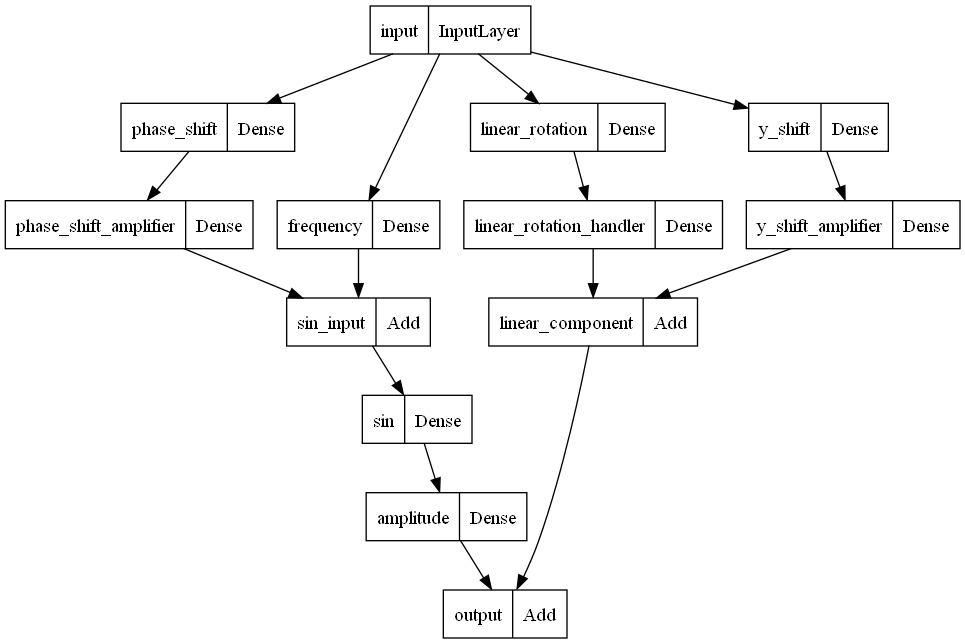

In [28]:
tf.keras.utils.plot_model(sin_model)

In [29]:
sin_model.weights

[<tf.Variable 'phase_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'frequency/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.01720242]], dtype=float32)>,
 <tf.Variable 'phase_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'linear_rotation/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.e-06]], dtype=float32)>,
 <tf.Variable 'y_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[95.987305]], dtype=float32)>,
 <tf.Variable 'linear_rotation_handler/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.e-06]], dtype=float32)>,
 <tf.Variable 'y_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'sin/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'amplitude/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[185.24225]], dtype=float32)>]

# Forecast:  Test on a synthetic example

18/18 [==============================] - 0s 1ms/step


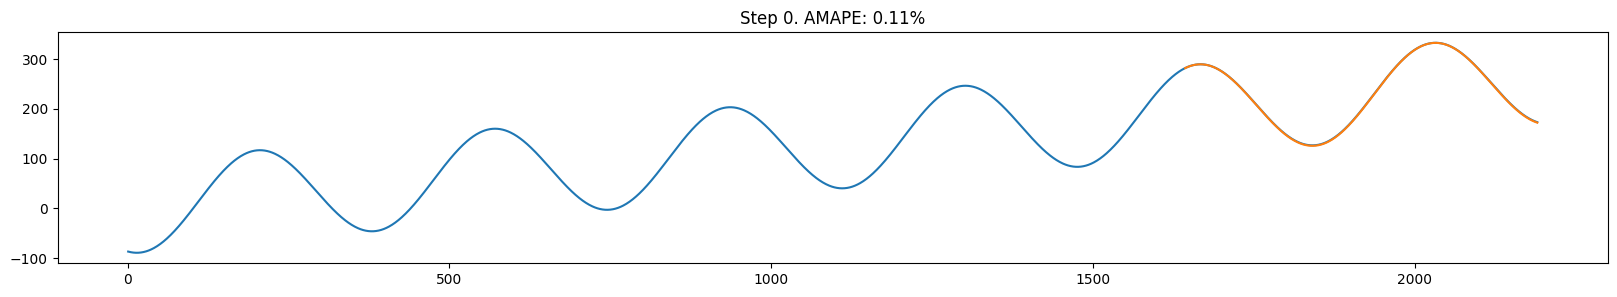

In [30]:
for step in range(1):
  sin_model.fit(
      X_train,
      y_train,
      epochs=50,
      verbose=False
      )
  y_pred = sin_model.predict(X_test)
  amape =  amape_score(y_test, y_pred, reference=y_train)
  fig = plt.figure(figsize=(20,3))
  plt.plot(X.flatten(), y)
  plt.plot(X_test.flatten(), y_pred)
  plt.title(f'Step {step}. AMAPE: {amape:.2f}%')
  plt.show()

In [31]:
sin_model.weights

[<tf.Variable 'phase_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'frequency/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.01720242]], dtype=float32)>,
 <tf.Variable 'phase_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-1.8939857]], dtype=float32)>,
 <tf.Variable 'linear_rotation/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.34341955]], dtype=float32)>,
 <tf.Variable 'y_shift/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[95.987305]], dtype=float32)>,
 <tf.Variable 'linear_rotation_handler/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[-0.34341958]], dtype=float32)>,
 <tf.Variable 'y_shift_amplifier/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.0095902]], dtype=float32)>,
 <tf.Variable 'sin/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>,
 <tf.Variable 'amplitude/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[92.390045]], dtype=float32)>]